In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from datetime import datetime as dt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CC_LCL-FullData.csv')

In [ ]:
print("Total records:", len(df))

Total records: 167932474


In [ ]:
df.head(100)

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0
...,...,...,...,...
95,MAC000002,Std,2012-10-14 00:30:00.0000000,0.166
96,MAC000002,Std,2012-10-14 01:00:00.0000000,0.226
97,MAC000002,Std,2012-10-14 01:30:00.0000000,0.088
98,MAC000002,Std,2012-10-14 02:00:00.0000000,0.126


LCLid: This is a unique identifier assigned to each household. It helps track energy consumption patterns for individual homes over time.

stdorToU: This column indicates whether the household follows a Standard (Std) tariff or a Time-of-Use (ToU) tariff. Time-of-Use tariffs vary electricity pricing based on the time of day, influencing energy consumption behavior.

DateTime: This represents the exact timestamp when the energy consumption was recorded. The data is collected at half-hour intervals, allowing for detailed time-based analysis of usage trends.

KWH/hh (per half hour): This column shows the amount of electricity consumed by the household in kilowatt-hours (kWh) during the given 30-minute period. It is the primary metric for energy usage analysis and forecasting.

In [ ]:
# Check for missing values in each column
df.isnull().sum()

,0
LCLid,0
stdorToU,0
DateTime,0
KWH/hh (per half hour),0


In [ ]:
# Droping the 'stdorToU' column as it's not needed for analysis
df.drop('stdorToU',axis=1,inplace=True)

In [ ]:
df.head(100)

,LCLid,DateTime,KWH/hh (per half hour)
0,MAC000002,2012-10-12 00:30:00.0000000,0
1,MAC000002,2012-10-12 01:00:00.0000000,0
2,MAC000002,2012-10-12 01:30:00.0000000,0
3,MAC000002,2012-10-12 02:00:00.0000000,0
4,MAC000002,2012-10-12 02:30:00.0000000,0
...,...,...,...
95,MAC000002,2012-10-14 00:30:00.0000000,0.166
96,MAC000002,2012-10-14 01:00:00.0000000,0.226
97,MAC000002,2012-10-14 01:30:00.0000000,0.088
98,MAC000002,2012-10-14 02:00:00.0000000,0.126


In [ ]:
# Checking for duplicate entries based on 'DateTime' and 'LCLid'
df.duplicated(subset=['DateTime', 'LCLid']).sum()

np.int64(115453)

In [ ]:
# Display some duplicate rows for verification
df[df.duplicated(subset=['DateTime', 'LCLid'])].head()

,LCLid,DateTime,KWH/hh (per half hour)
383,MAC000002,2012-10-20 00:00:00.0000000,0.2
1823,MAC000002,2012-11-20 00:00:00.0000000,0.258
3312,MAC000002,2012-12-21 00:00:00.0000000,0.238
4801,MAC000002,2013-01-21 00:00:00.0000000,0.21
6290,MAC000002,2013-02-21 00:00:00.0000000,0.216


In [ ]:
# Removing the duplicates
df.drop_duplicates(subset=['DateTime', 'LCLid'], inplace=True)

In [ ]:
df.duplicated(subset=['DateTime', 'LCLid']).sum()

np.int64(0)

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
# Create 'Day' column with just the date part of 'DateTime'
df['Day'] = df['DateTime'].dt.normalize()
# Drop the 'DateTime' column
df.drop('DateTime', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167817021 entries, 0 to 167932473
Data columns (total 3 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   LCLid                    object        
 1   KWH/hh (per half hour)   object        
 2   Day                      datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 5.0+ GB


In [ ]:
df.head()

,LCLid,KWH/hh (per half hour),Day
0,MAC000002,0,2012-10-12
1,MAC000002,0,2012-10-12
2,MAC000002,0,2012-10-12
3,MAC000002,0,2012-10-12
4,MAC000002,0,2012-10-12


In [ ]:
df[df['Day'] == '2011-11-28']

,LCLid,KWH/hh (per half hour),Day
4354870,MAC000145,0.162,2011-11-28
4354871,MAC000145,0.106,2011-11-28
4354872,MAC000145,0.154,2011-11-28
4354873,MAC000145,0.152,2011-11-28
4354874,MAC000145,0.107,2011-11-28
...,...,...,...
135403405,MAC000198,0.193,2011-11-28
135403406,MAC000198,0.142,2011-11-28
135403407,MAC000198,0.212,2011-11-28
135403408,MAC000198,0.327,2011-11-28


In [ ]:
# Convert 'Null' strings to actual NaN values
df['KWH/hh (per half hour) '] = pd.to_numeric(df['KWH/hh (per half hour) '], errors='coerce')

**Linear Interpolation:**

Missing values are replaced with a linearly estimated value based on the nearest valid values before and after the missing point.

Formula:

y = y1 + ((y2-y1)*(x-x1))/(x2-x1)

where,

y: missing value

𝑦1, y2: are known values before and after the missing point,

x : x is the missing index.

In [ ]:
# Now fill the missing values using linear interpolation
df['KWH/hh (per half hour) '] = df['KWH/hh (per half hour) '].interpolate(method='linear')

In [ ]:
df['KWH/hh (per half hour) '].isnull().sum()

np.int64(0)

In [ ]:
df.LCLid.unique()

array(['MAC000002', 'MAC000003', 'MAC000004', ..., 'MAC005557',
       'MAC005564', 'MAC005565'], dtype=object)

**House Count**
> In the dataset we see that the number of households for which energy data was collected across different days are different. This is probably due to the gradually increasing adoption of smart meters in London.  This could lead to false interpretation that the energy for a particular day might be high when it could be that the data was only collected for more number of houses.

**Groups Data by Day and LCLid:**

groupby(['Day', 'LCLid'])

*groups the data by date (Day) and household (LCLid)*.

This ensures that energy consumption is analyzed separately for each household on each day.

**Aggregate Energy Consumption (KWH/hh (per half hour)) by Sum:**

['KWH/hh (per half hour) '].sum()

*calculates the total energy consumption for each household on each day.*

Since the original dataset has half-hourly readings, summing them gives the daily consumption.

**Resets Index to Convert Back to DataFrame:**

.reset_index()

*ensures the result is a properly formatted DataFrame instead of a grouped object.*

In [ ]:
grouped_df = df.groupby(['Day', 'LCLid'])['KWH/hh (per half hour) '].sum().reset_index()

In [ ]:
len(grouped_df)

3510433

In [ ]:
grouped_df.head()

,Day,LCLid,KWH/hh (per half hour)
0,2011-11-23,MAC000145,8.952
1,2011-11-23,MAC000146,5.619
2,2011-11-23,MAC000147,3.036
3,2011-11-23,MAC000148,1.283
4,2011-11-23,MAC000149,2.287


In [ ]:
grouped_df.rename(columns={'KWH/hh (per half hour) ': 'Total_Daily_Consumption'}, inplace=True)

In [ ]:
# Count the number of unique households (LCLid) reporting energy consumption for each day
housecount = grouped_df.groupby('Day')[['LCLid']].nunique()

<Axes: xlabel='Day'>

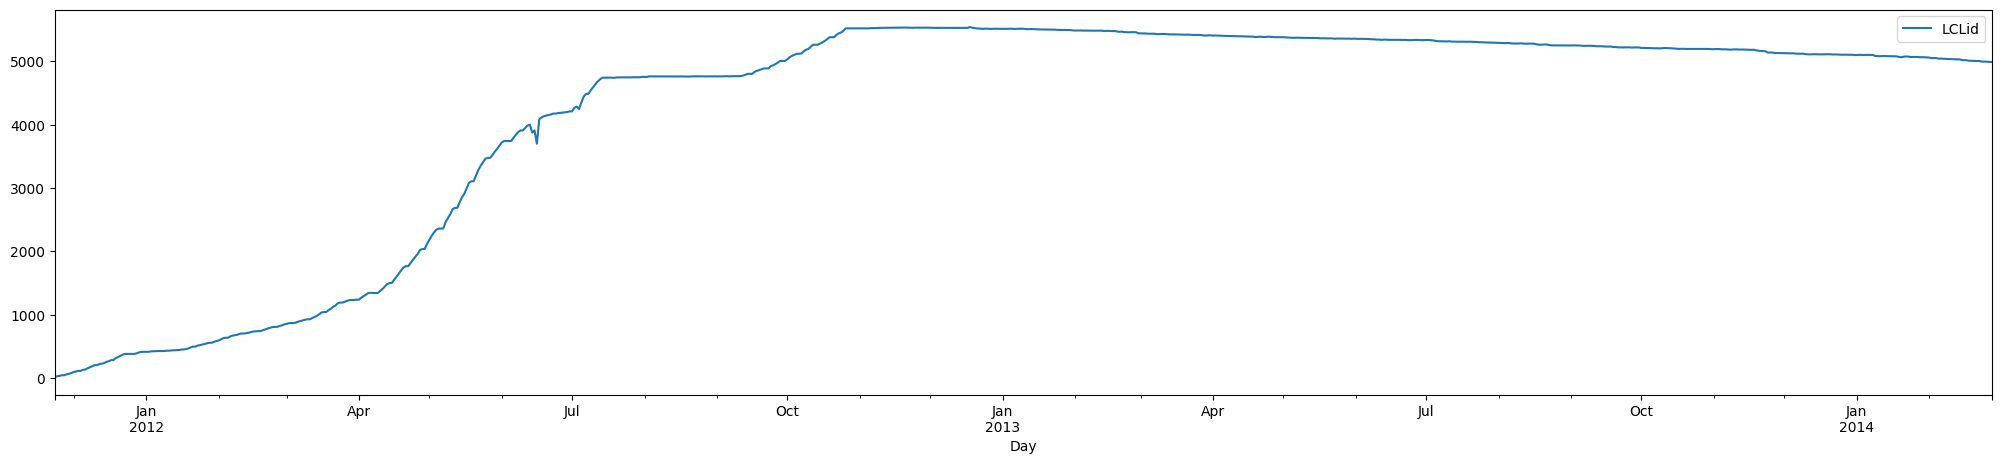

In [ ]:
housecount.plot(figsize=(25,5))

**Rapid Increase (Jan–Jul 2012):**

The count starts near zero and climbs quickly, reaching around 4,000–5,000 households by mid-2012.
This surge indicates a large number of new smart meters being installed or activated over a few months.

**Peak & Stability (Mid-2012–Early 2013):**

The curve levels off at approximately 5,000 households, suggesting widespread meter adoption and consistent reporting.
This plateau indicates stable participation, with most of the targeted homes now providing data.

**Gradual Decline (2013–Early 2014):**

After reaching a peak, there’s a slight decrease toward the end of the period.
Possible reasons include households opting out, meter faults, or data collection gaps.

In [ ]:
# Group 'grouped_df' by 'Day' and sum the 'Total_Daily_Consumption'
grouped_df = grouped_df.groupby('Day')['Total_Daily_Consumption'].sum().reset_index()
# Merge the summed 'grouped_df' with 'housecount' on 'Day'
final_df = grouped_df.merge(housecount, on='Day')
# Reset the index of 'final_df'
final_df = final_df.reset_index(drop=True)

In [ ]:
final_df.head()

,Day,Total_Daily_Consumption,LCLid
0,2011-11-23,90.385000,13
1,2011-11-24,213.412000,25
2,2011-11-25,303.993000,32
3,2011-11-26,420.976000,41
4,2011-11-27,444.883001,41


In [ ]:
len(final_df)

829

In [ ]:
pip install tables

In [ ]:
final_df.to_hdf('cleaned_energy_data.h5', key='df', mode='w')

H5 Files (Hierarchical Data Format - HDF5)

H5 (HDF5) is a binary file format designed to store large amounts of structured data efficiently. It is commonly used for datasets that are too large to fit into memory, particularly in scientific computing, machine learning, and data analytics.

### Merging with other factors: weather, holiday

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import date as dt
loaded_df = pd.read_hdf('cleaned_energy_data.h5', key='df')

In [ ]:
loaded_df['avg_energy'] =  loaded_df['Total_Daily_Consumption']/loaded_df['LCLid']
print("Starting Point of Data at Day Level",min(loaded_df.Day))
print("Ending Point of Data at Day Level",max(loaded_df.Day))

Starting Point of Data at Day Level 2011-11-23 00:00:00
Ending Point of Data at Day Level 2014-02-28 00:00:00


> # Weather Data

In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/energy-consumption-forecasting-main/Data/weather_daily_darksky.csv')
weather.head(4)

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25


Key Column Descriptions:

temperatureMax – Maximum temperature recorded during the day.

temperatureMaxTime – Time when the maximum temperature was recorded.

windBearing – Direction of the wind in degrees (0° = North, 90° = East, etc.).

icon – A short description of weather conditions (e.g., fog, partly-cloudy-day).

dewPoint – The temperature at which air reaches 100% humidity and condensation occurs.

temperatureMinTime – Time when the minimum temperature was recorded.

cloudCover – Fraction of the sky covered by clouds (0 = clear sky, 1 = fully overcast).

windSpeed – Wind speed measurement.

pressure – Atmospheric pressure (measured in hPa or millibars).

apparentTemperatureMinTime – Time when the lowest feels-like temperature occurred.

temperatureHigh – Another measurement of the day's highest temperature.

sunriseTime – The time when the sun rises.

temperatureHighTime – The time at which the highest temperature was recorded.

uvIndexTime – The time of the highest recorded UV index.

summary – A short textual summary of the weather conditions.

temperatureLowTime – The time when the lowest temperature occurred.

apparentTemperatureMin – The lowest feels-like temperature (wind chill/humidity adjusted).

apparentTemperatureMaxTime – The time when the highest feels-like temperature occurred.

apparentTemperatureLowTime – The time when the lowest feels-like temperature occurred.

moonPhase – A value (0 to 1) representing the moon phase (0 = new moon, 0.5 = full moon).

In [ ]:
weather.time.info()

<class 'pandas.core.series.Series'>
RangeIndex: 882 entries, 0 to 881
Series name: time
Non-Null Count  Dtype 
--------------  ----- 
882 non-null    object
dtypes: object(1)
memory usage: 7.0+ KB


In [ ]:
weather['Day'] = pd.to_datetime(weather['time'])
weather.drop('time',inplace=True,axis=1)
weather['Day'] = weather['Day'].dt.normalize()

In [ ]:
# selecting numeric variables
weather = weather[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','Day']]
weather = weather.dropna()

In [ ]:
energy_weather=loaded_df.merge(weather,on='Day')
energy_weather.head(2)

,Day,Total_Daily_Consumption,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,2011-11-23,90.385,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,8.06,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94
1,2011-11-24,213.412,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97


> # Holiday

In [ ]:
holiday = pd.read_csv('/content/drive/MyDrive/energy-consumption-forecasting-main/Data/uk_bank_holidays.csv')
holiday['Bank holidays'] = pd.to_datetime(holiday['Bank holidays']).dt.normalize()
holiday.head(4)

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)


In [ ]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Bank holidays  25 non-null     datetime64[ns]
 1   Type           25 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 532.0+ bytes


In [ ]:
Final_DF = energy_weather.merge(holiday, left_on = 'Day',right_on = 'Bank holidays',how = 'left')

In [ ]:
Final_DF['holiday_ind'] = np.where(Final_DF['Bank holidays'].isna(),0,1)

In [ ]:
Final_DF[Final_DF['holiday_ind']==1]

,Day,Total_Daily_Consumption,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Bank holidays,Type,holiday_ind
70,2012-02-01,8150.828998,590,13.814964,3.36,53,-4.69,0.36,5.45,1032.32,...,-1.86,1.0,-1.66,-0.92,3.36,-5.98,0.29,2012-02-01,New Year?s Day (substitute day),1
136,2012-04-06,14166.792006,1342,10.556477,10.48,2,4.36,0.72,2.09,1012.32,...,10.48,3.0,6.52,6.86,10.48,6.42,0.53,2012-04-06,Spring bank holiday (substitute day),1
166,2012-05-06,25069.815997,2358,10.631813,14.48,160,6.55,0.52,2.54,1014.29,...,14.48,4.0,10.43,5.20,14.48,4.48,0.55,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday),1
195,2012-06-04,33059.635000,3741,8.837112,15.00,160,8.14,0.51,3.42,1014.65,...,15.00,6.0,11.54,7.54,15.00,7.54,0.54,2012-06-04,Good Friday,1
226,2012-07-05,35166.288998,4348,8.087923,18.70,193,13.22,0.39,2.46,1007.45,...,18.70,5.0,13.42,14.78,18.70,14.78,0.60,2012-07-05,Early May bank holiday,1
279,2012-08-27,39589.041998,4761,8.315279,22.50,224,13.49,0.39,4.17,1012.79,...,22.50,4.0,14.74,14.97,22.50,14.97,0.39,2012-08-27,Summer bank holiday,1
287,2012-09-04,39716.142000,4763,8.338472,19.97,5,7.83,0.27,3.26,1026.74,...,19.97,3.0,8.67,12.07,19.97,12.07,0.66,2012-09-04,Easter Monday,1
398,2012-12-25,68988.858001,5515,12.509312,9.14,225,6.27,0.56,4.39,995.66,...,6.49,1.0,4.83,6.46,9.14,3.86,0.41,2012-12-25,Christmas Day,1
399,2012-12-26,64350.884999,5513,11.672571,10.18,230,5.73,0.39,5.05,1004.15,...,10.18,1.0,6.42,4.83,10.18,1.34,0.44,2012-12-26,Boxing Day,1
405,2013-01-01,65269.368001,5513,11.839174,7.49,257,2.40,0.43,4.00,1016.89,...,4.38,1.0,4.42,3.31,5.76,0.23,0.63,2013-01-01,New Year?s Day,1


In [ ]:
Final_DF.to_hdf('data.h5',mode = 'w', key = 'df')

<ipython-input-44-06399bd485b1>:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['Type'], dtype='object')]

  Final_DF.to_hdf('data.h5',mode = 'w', key = 'df')


In [ ]:
Final_DF.to_csv('data.csv',mode='w')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ['Total_Daily_Consumption', 'temperatureMax', 'windSpeed', 'pressure',
            'humidity', 'apparentTemperatureMax', 'uvIndex', 'temperatureLow', 'temperatureHigh']

Final_DF[num_cols] = scaler.fit_transform(Final_DF[num_cols])


In [ ]:
Final_DF['LCLid'] = Final_DF['LCLid'].astype('category').cat.codes

In [ ]:
Final_DF['LCLid'] = Final_DF['LCLid'].astype('category').cat.codes

In [ ]:
Final_DF['Month'] = Final_DF['Day'].dt.month
Final_DF['Weekday'] = Final_DF['Day'].dt.weekday


In [ ]:
Final_DF['Prev_Day_Consumption'] = Final_DF['Total_Daily_Consumption'].shift(1)

In [ ]:
Final_DF['7_Day_Moving_Avg'] = Final_DF['Total_Daily_Consumption'].rolling(window=7).mean()

In [ ]:
Q1 = Final_DF['Total_Daily_Consumption'].quantile(0.25)
Q3 = Final_DF['Total_Daily_Consumption'].quantile(0.75)
IQR = Q3 - Q1
Final_DF = Final_DF[(Final_DF['Total_Daily_Consumption'] >= (Q1 - 1.5 * IQR)) &
                     (Final_DF['Total_Daily_Consumption'] <= (Q3 + 1.5 * IQR))]

In [ ]:
# Print the first 10 rows of the updated dataset
print("Updated Dataset After Preprocessing:")
print(Final_DF.head(10))

Updated Dataset After Preprocessing:
         Day  Total_Daily_Consumption  LCLid  avg_energy  temperatureMax  \
0 2011-11-23                 0.000000      0    6.952692        0.321010   
1 2011-11-24                 0.001490      1    8.536480        0.400185   
2 2011-11-25                 0.002587      2    9.499781        0.403266   
3 2011-11-26                 0.004004      3   10.267707        0.401109   
4 2011-11-27                 0.004294      3   10.850805        0.418977   
5 2011-11-28                 0.004970      4    9.103382        0.389402   
6 2011-11-29                 0.005983      5    9.274873        0.416821   
7 2011-11-30                 0.007018      6    8.813513        0.367529   
8 2011-12-01                 0.009188      7    9.227707        0.376155   
9 2011-12-02                 0.011194      8   10.145910        0.250462   

   windBearing  dewPoint  cloudCover  windSpeed  pressure  ...  \
0          229      6.29        0.36   0.188525  0.776228  .

In [ ]:
# Create full_data
full_data = Final_DF.copy()

# Setup input parameters
forecast_periods = [7, 30, 365]
validation_rmse = 0.4951
test_rmse = 3.007
last_known_date = full_data['Day'].max()

# Prepare exogenous features
exog = full_data[['temperatureMax', 'humidity', 'windSpeed', 'holiday_ind']]
y = full_data['avg_energy']

# Train SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y, order=(1,1,0), seasonal_order=(0,1,0,7), exog=exog)
results = model.fit(disp=False)

# Updated Future Forecasting Part
future_forecasts = []

for days in forecast_periods:
    last_exog = exog.iloc[-1:]
    future_exog = pd.concat([last_exog] * days, ignore_index=True)
    preds = results.forecast(steps=days, exog=future_exog)
    preds = np.clip(preds, 0, None)

    future_dates = pd.date_range(start=last_known_date + pd.Timedelta(days=1), periods=days)

    temp_df = pd.DataFrame({
        'Date': future_dates,
        'Actual Energy Consumption': np.nan,
        'Predicted Energy Consumption': preds.values,
        'Holiday Indicator': future_exog['holiday_ind'],
        'Temperature': future_exog['temperatureMax'],
        'Humidity': future_exog['humidity'],
        'Wind Speed': future_exog['windSpeed'],
        'Prediction Period': [f'{days} Days'] * days,
        'Validation RMSE': [validation_rmse] * days,
        'Test RMSE': [test_rmse] * days
    })
    future_forecasts.append(temp_df)

# Combine future forecasts
future_df = pd.concat(future_forecasts, ignore_index=True)

# Save
future_df.to_csv('future_energy_forecasts_updated.csv', index=False)

print("Future energy forecasts ready!")


✅ Future energy forecasts ready!


In [ ]:
# === Prepare Historic Dataset for Tableau ===

# Make a copy
historic_df = full_data.copy()

# Rename and arrange columns
historic_df = historic_df.rename(columns={
    'Day': 'Date',
    'avg_energy': 'Actual Energy Consumption',
    'holiday_ind': 'Holiday Indicator',
    'temperatureMax': 'Temperature',
    'humidity': 'Humidity',
    'windSpeed': 'Wind Speed'
})

# Add missing forecast-related columns
historic_df['Predicted Energy Consumption'] = np.nan
historic_df['Prediction Period'] = 'Historic Data'
historic_df['Validation RMSE'] = validation_rmse
historic_df['Test RMSE'] = test_rmse

# Select columns for Tableau
historic_df = historic_df[['Date', 'Actual Energy Consumption', 'Predicted Energy Consumption',
                           'Holiday Indicator', 'Temperature', 'Humidity', 'Wind Speed',
                           'Prediction Period', 'Validation RMSE', 'Test RMSE']]

# Export to CSV
historic_df.to_csv('historic_energy_tableau.csv', index=False)

print(" historic_energy_tableau.csv created successfully!")


✅ historic_energy_tableau.csv created successfully!
